In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks #to wszystko musi być żeby działały biblioteki

In [250]:
data = pd.read_excel("agata_dollyo_trad_p.xlsx") #tak ładujemy konkretny plik
data

,Time,2x,2y,2z,3x,3y,3z,4x,4y,4z,Total_GRF
0,-1.1485,-749.069,587.927,356.467,-919.978,397.485,331.075,-252.945,-23.4389,1103.58,-1.08192
1,-1.1480,-749.069,587.927,356.467,-919.978,397.485,331.075,-252.945,-23.4389,1103.58,-1.98376
2,-1.1475,-753.342,587.927,360.129,-922.053,399.561,335.226,-258.927,-27.3454,1096.75,-3.78742
3,-1.1470,-761.887,587.927,367.454,-926.204,403.711,343.527,-270.891,-35.1584,1083.07,-4.68314
4,-1.1465,-770.433,587.927,374.779,-930.355,407.862,351.828,-282.854,-42.9714,1069.40,-4.67092
...,...,...,...,...,...,...,...,...,...,...,...
30835,14.2690,-794.238,528.230,290.789,-919.978,282.000,419.825,-236.709,47.2441,1079.17,-3.87437
30836,14.2695,-789.843,545.077,277.605,-919.978,280.535,411.280,-240.859,41.6285,1073.31,-3.66471
30837,14.2700,-785.448,561.924,264.420,-919.978,279.070,402.735,-245.010,36.0129,1067.45,-3.56767
30838,14.2705,-790.331,569.615,257.096,-923.396,278.337,399.805,-247.818,39.5532,1066.59,-3.58326


In [251]:
G_TO_MPS2 = 9.80665  # Conversion factor from g to m/s²
MILLI_G_TO_MPS2 = G_TO_MPS2 / 1000  # Conversion factor from milli-g to m/s²
data[['2x', '2y', '2z']] *= MILLI_G_TO_MPS2
data[['3x', '3y', '3z']] *= MILLI_G_TO_MPS2
data[['4x', '4y', '4z']] *= MILLI_G_TO_MPS2
#teraz obliczamy przyspieszenie wypadkowe i siłe wypadkową
data['afoot'] = np.sqrt(data['2x']**2 + data['2y']**2 + data['2z']**2)
data['ashank'] = np.sqrt(data['3x']**2 + data['3y']**2 + data['3z']**2)
data['atigh'] = np.sqrt(data['4x']**2 + data['4y']**2 + data['4z']**2)
data

,Time,2x,2y,2z,3x,3y,3z,4x,4y,4z,Total_GRF,afoot,ashank,atigh
0,-1.1485,-7.345858,5.765594,3.495747,-9.021902,3.897996,3.246737,-2.480543,-0.229857,10.822423,-1.08192,9.971156,10.350381,11.105438
1,-1.1480,-7.345858,5.765594,3.495747,-9.021902,3.897996,3.246737,-2.480543,-0.229857,10.822423,-1.98376,9.971156,10.350381,11.105438
2,-1.1475,-7.387761,5.765594,3.531659,-9.042251,3.918355,3.287444,-2.539206,-0.268167,10.755443,-3.78742,10.014675,10.388604,11.054368
3,-1.1470,-7.471559,5.765594,3.603493,-9.082958,3.959052,3.368849,-2.656533,-0.344786,10.621288,-4.68314,10.102051,10.465342,10.953895
4,-1.1465,-7.555367,5.765594,3.675326,-9.123666,3.999760,3.450254,-2.773850,-0.421405,10.487232,-4.67092,10.189881,10.542467,10.856051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30835,14.2690,-7.788814,5.180167,2.851666,-9.021902,2.765475,4.117077,-2.321322,0.463306,10.583042,-3.87437,9.779149,10.295285,10.844537
30836,14.2695,-7.745714,5.345379,2.722375,-9.021902,2.751109,4.033279,-2.362020,0.408236,10.525576,-3.66471,9.796963,10.258200,10.795070
30837,14.2700,-7.702614,5.510592,2.593074,-9.021902,2.736742,3.949481,-2.402727,0.353166,10.468109,-3.56767,9.819415,10.221687,10.746121
30838,14.2705,-7.750500,5.586015,2.521250,-9.055421,2.729554,3.920748,-2.430264,0.387884,10.459675,-3.58326,9.880815,10.238329,10.745298


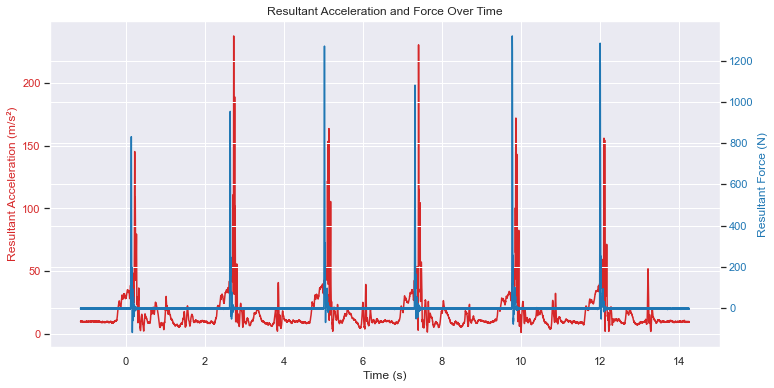

In [252]:
import matplotlib.pyplot as plt

import seaborn as sns

# Setting the style
sns.set(style="darkgrid")

# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the resultant acceleration
color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Resultant Acceleration (m/s²)', color=color)
ax1.plot(data['Time'], data['afoot'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis to plot the resultant force
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Resultant Force (N)', color=color)
ax2.plot(data['Time'], data['Total_GRF'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Resultant Acceleration and Force Over Time')
plt.show()


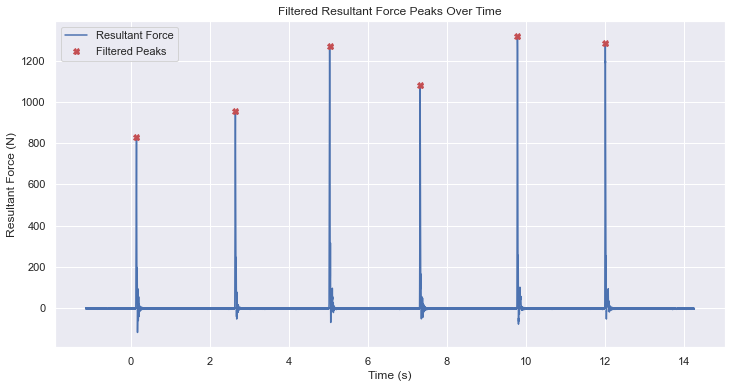

In [253]:
# Finding peaks with a minimum height of 300
peaks, _ = find_peaks(data['Total_GRF'], height=300, prominence = 250)

# Ensuring a minimum time separation of 0.1s between peaks
min_time_separation = 0.1  # 0.1 seconds
filtered_peaks = []
last_peak_time = -min_time_separation
for peak in peaks:
    if data.iloc[peak]['Time'] - last_peak_time >= min_time_separation:
        filtered_peaks.append(peak)
        last_peak_time = data.iloc[peak]['Time']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['Total_GRF'], label='Resultant Force')
plt.plot(data['Time'][filtered_peaks], data['Total_GRF'][filtered_peaks], 'rX', label='Filtered Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Resultant Force (N)')
plt.title('Filtered Resultant Force Peaks Over Time')
plt.legend()
plt.show()

In [254]:
peak_table = data.iloc[filtered_peaks][['Time', 'Total_GRF', 'afoot', 'ashank', 'atigh']]

peak_table

,Time,Total_GRF,afoot,ashank,atigh
2574,0.1385,831.773,47.234151,23.687619,100.731749
7585,2.6440,954.609,47.420388,17.887836,140.991001
12359,5.0310,1271.980,37.538681,16.176704,123.417221
16946,7.3245,1082.050,41.774245,16.139544,100.797944
21873,9.7880,1321.300,39.556573,18.221425,116.910411
26326,12.0145,1286.070,48.610498,21.061050,126.746141
